In [2]:
import pandas as pd
import matplotlib
import seaborn as sns
import pydotplus
from scipy import misc

In [3]:
pd.options.mode.chained_assignment = None

In [4]:
data = pd.read_csv("ml_project1_data.csv")

In [5]:
def income_category(numeric_income):
    if numeric_income >= 0 and numeric_income <= 25000:
        return 0
    if numeric_income >= 25001 and numeric_income <= 50000:
        return 1
    if numeric_income >= 50001 and numeric_income <= 75000:
        return 2
    if numeric_income >= 75001:
        return 3

In [300]:
data['Class_Income'] = [income_category(x) for x in data.Income]

In [301]:
def birth_category(numeric_birth):
    if numeric_birth >= 1940 and numeric_birth <= 1954:
        return 0
    if numeric_birth >= 1955 and numeric_birth <= 1969:
        return 1
    if numeric_birth >= 1970 and numeric_birth <= 1984:
        return 2
    if numeric_birth >= 1985:
        return 3

In [302]:
data['Class_Birth'] = [birth_category(x) for x in data.Income]

In [303]:
data.columns.values

array(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Z_CostContact', 'Z_Revenue', 'Response', 'Class_Income',
       'Class_Birth'], dtype=object)

In [304]:
dadosf = data.where(data.Income <= 200000).dropna()
dadosff = dadosf.where(dadosf.Year_Birth >= 1940).dropna()

In [305]:
dataPre = dadosff.dropna()

In [306]:
dataPre.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524.0      1957.0  Graduation         Single  58138.0      0.0       0.0   
1  2174.0      1954.0  Graduation         Single  46344.0      1.0       1.0   
2  4141.0      1965.0  Graduation       Together  71613.0      0.0       0.0   
3  6182.0      1984.0  Graduation       Together  26646.0      1.0       0.0   
4  5324.0      1981.0         PhD        Married  58293.0      1.0       0.0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-09-04     58.0     635.0  ...           0.0           0.0   
1  2014-03-08     38.0      11.0  ...           0.0           0.0   
2  2013-08-21     26.0     426.0  ...           0.0           0.0   
3  2014-02-10     26.0      11.0  ...           0.0           0.0   
4  2014-01-19     94.0     173.0  ...           0.0           0.0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0           0.0           0.0       0.0            3.0       11.0       1.0   
1           0.0           0.0       0.0            3.0       11.0       0.0   
2           0.0           0.0       0.0            3.0       11.0       0.0   
3           0.0           0.0       0.0            3.0       11.0       0.0   
4           0.0           0.0       0.0            3.0       11.0       0.0   

   Class_Income  Class_Birth  
0           2.0          3.0  
1           1.0          3.0  
2           2.0          3.0  
3           1.0          3.0  
4           2.0          3.0  

[5 rows x 31 columns]

In [307]:
from sklearn.preprocessing import LabelEncoder

In [308]:
datasnsSelected = ['Year_Birth',
       'Income', 'Education',
       'Kidhome', 'Teenhome', 'Marital_Status', 'Recency', 'Response', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
datasnsFilterede = dataPre.filter(items=datasnsSelected)

datasnsFilterede['Education_b'] = LabelEncoder().fit_transform(datasnsFilterede['Education'])
datasnsFilterede['Marital_b'] = LabelEncoder().fit_transform(datasnsFilterede['Marital_Status'])

datasnsBinary = datasnsFilterede.drop(['Education', 'Marital_Status'], axis=1)
datasnsBinary.head()

Year_Birth   Income  Kidhome  Teenhome  Recency  Response  MntWines  \
0      1957.0  58138.0      0.0       0.0     58.0       1.0     635.0   
1      1954.0  46344.0      1.0       1.0     38.0       0.0      11.0   
2      1965.0  71613.0      0.0       0.0     26.0       0.0     426.0   
3      1984.0  26646.0      1.0       0.0     26.0       0.0      11.0   
4      1981.0  58293.0      1.0       0.0     94.0       0.0     173.0   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       88.0            546.0            172.0              88.0   
1        1.0              6.0              2.0               1.0   
2       49.0            127.0            111.0              21.0   
3        4.0             20.0             10.0               3.0   
4       43.0            118.0             46.0              27.0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0          88.0                3.0              8.0                 10.0   
1           6.0                2.0              1.0                  1.0   
2          42.0                1.0              8.0                  2.0   
3           5.0                2.0              2.0                  0.0   
4          15.0                5.0              5.0                  3.0   

   NumStorePurchases  Education_b  Marital_b  
0                4.0            2          4  
1                2.0            2          4  
2               10.0            2          5  
3                4.0            2          5  
4                6.0            4          3

In [309]:
datasnsBinary.columns.values

array(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'Response', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'Education_b', 'Marital_b'], dtype=object)

In [310]:
dataFI = datasnsBinary.where(datasnsBinary.Income <= 200000).dropna()

In [311]:
dataFI.head()

Year_Birth   Income  Kidhome  Teenhome  Recency  Response  MntWines  \
0      1957.0  58138.0      0.0       0.0     58.0       1.0     635.0   
1      1954.0  46344.0      1.0       1.0     38.0       0.0      11.0   
2      1965.0  71613.0      0.0       0.0     26.0       0.0     426.0   
3      1984.0  26646.0      1.0       0.0     26.0       0.0      11.0   
4      1981.0  58293.0      1.0       0.0     94.0       0.0     173.0   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       88.0            546.0            172.0              88.0   
1        1.0              6.0              2.0               1.0   
2       49.0            127.0            111.0              21.0   
3        4.0             20.0             10.0               3.0   
4       43.0            118.0             46.0              27.0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0          88.0                3.0              8.0                 10.0   
1           6.0                2.0              1.0                  1.0   
2          42.0                1.0              8.0                  2.0   
3           5.0                2.0              2.0                  0.0   
4          15.0                5.0              5.0                  3.0   

   NumStorePurchases  Education_b  Marital_b  
0                4.0            2          4  
1                2.0            2          4  
2               10.0            2          5  
3                4.0            2          5  
4                6.0            4          3

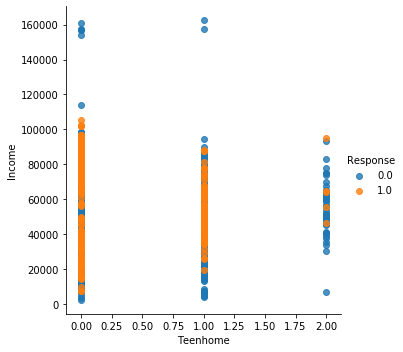

In [312]:
sns.lmplot(data=dataFI, x='Teenhome', y='Income', fit_reg=False, hue='Response')

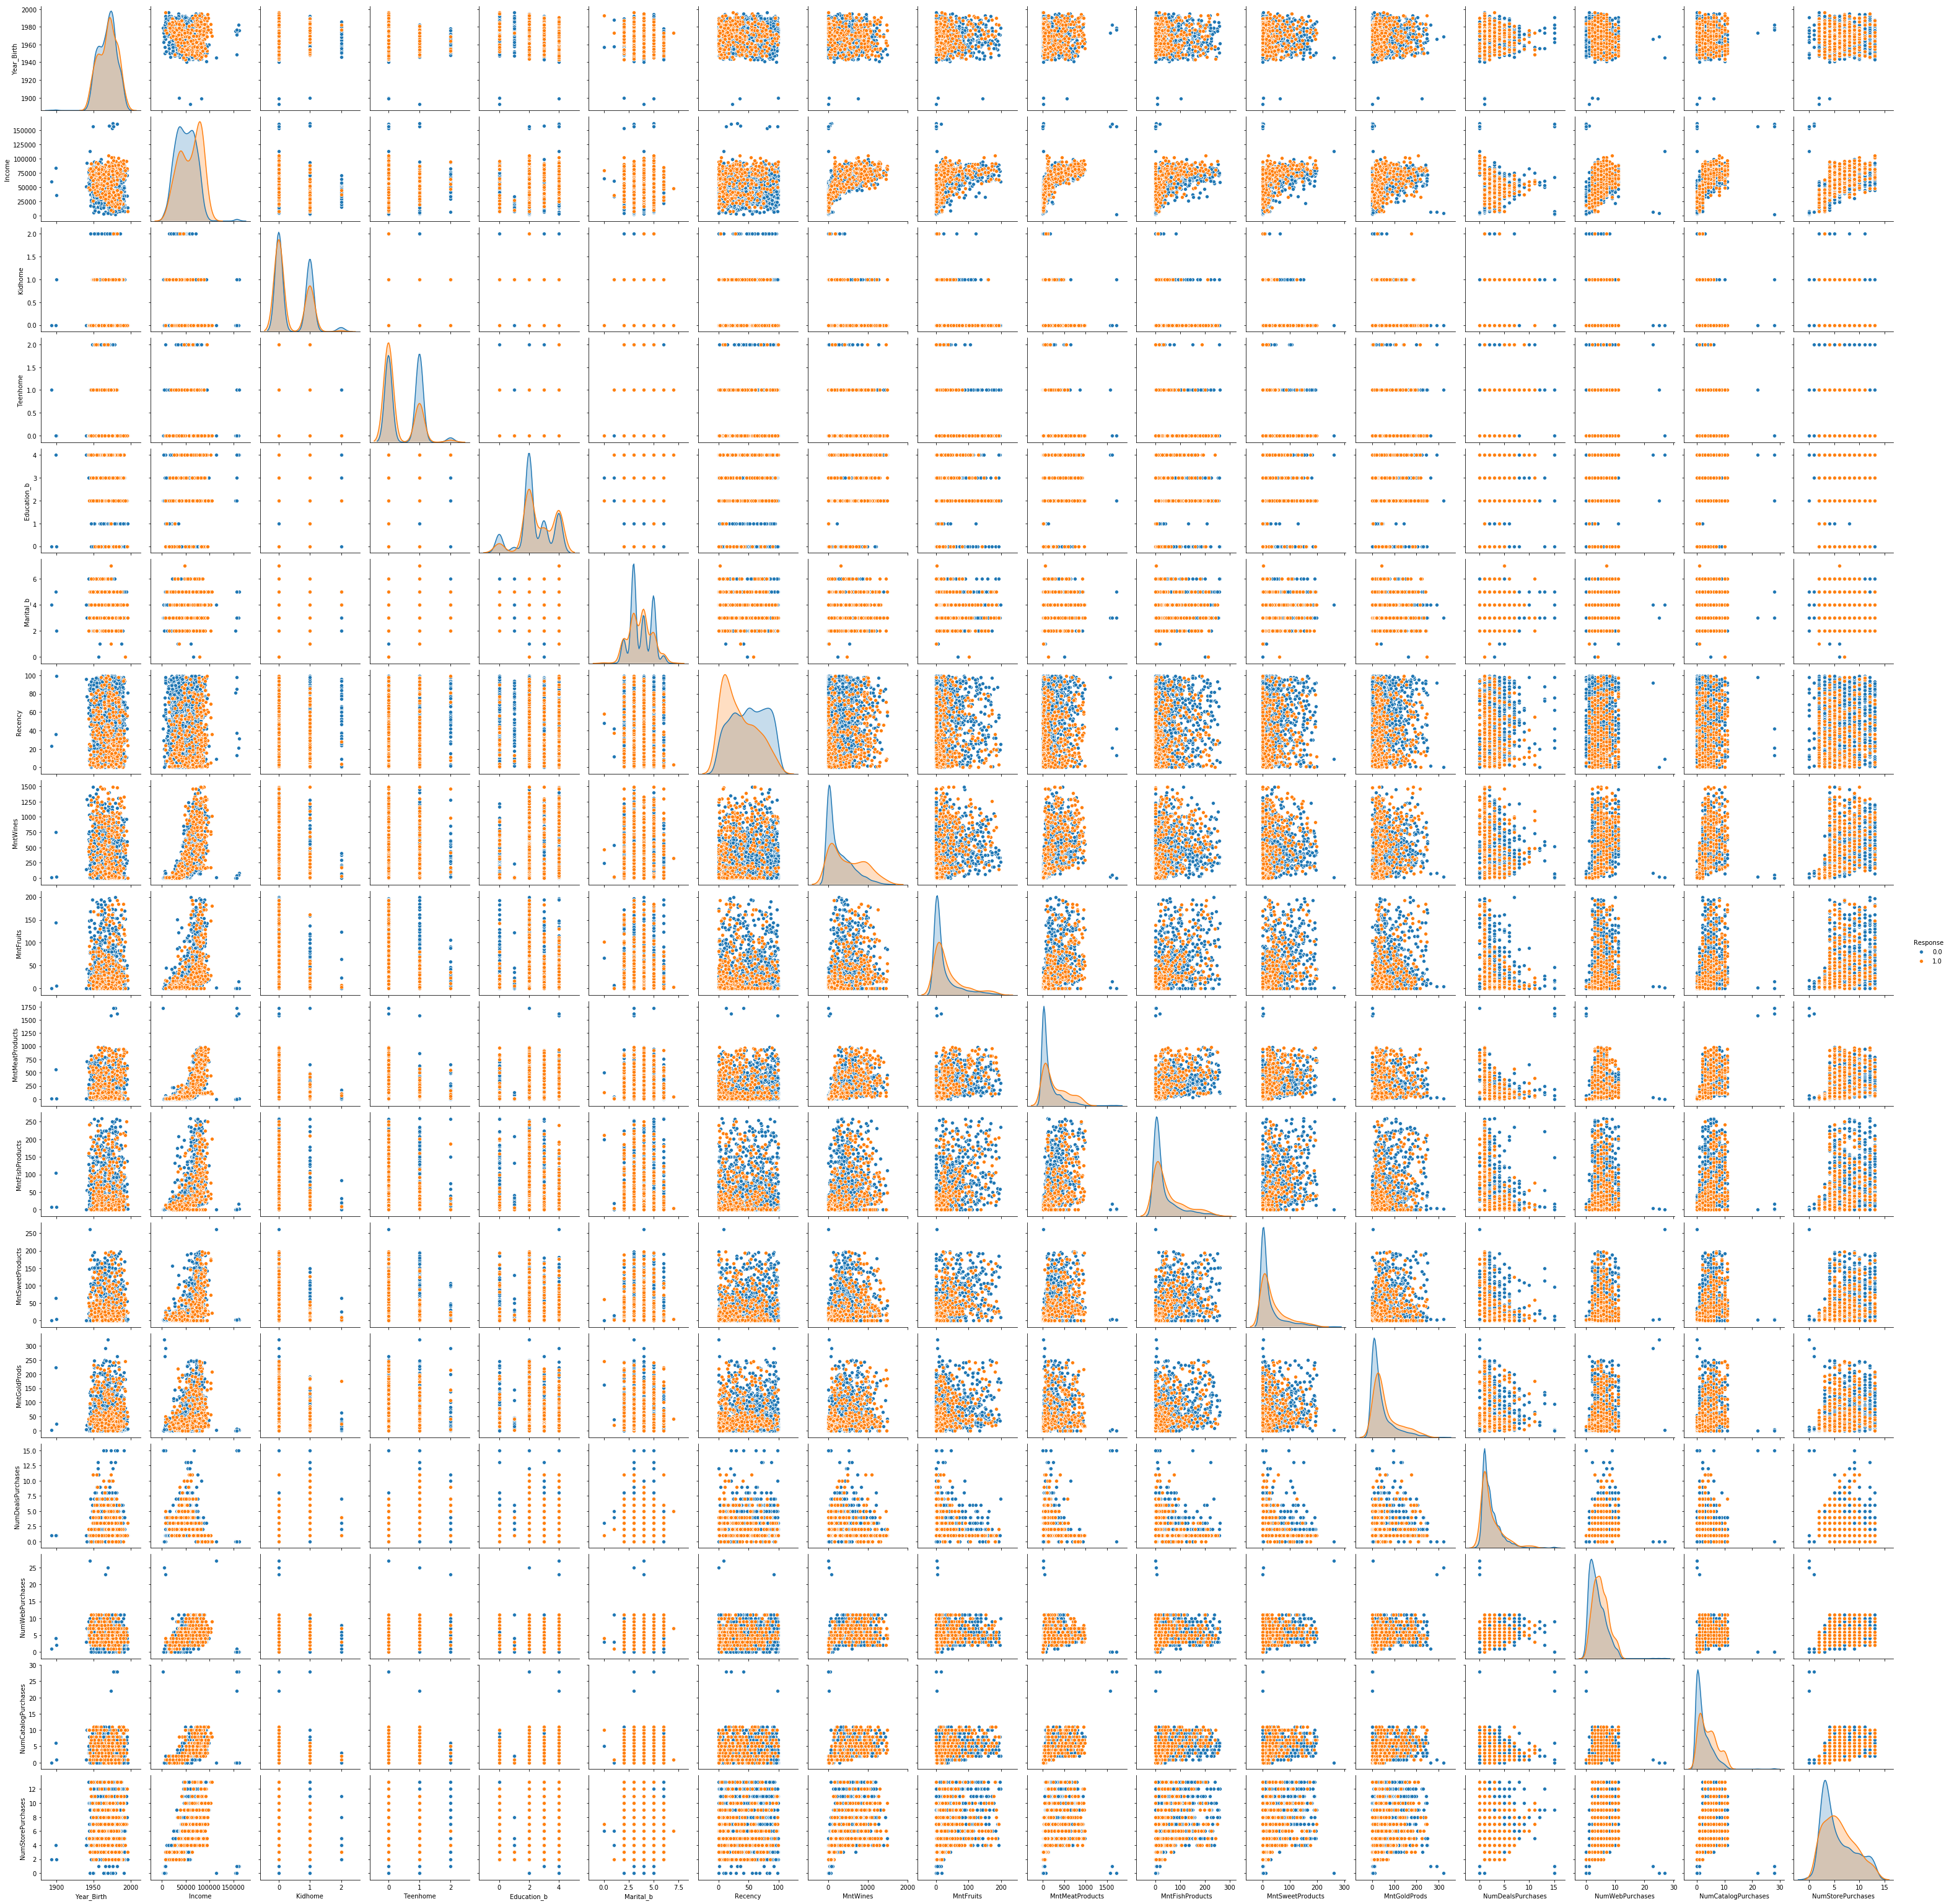

In [91]:
sns.pairplot(dataFI[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Response',
       'Education_b', 'Marital_b', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']], hue='Response')

In [314]:
dataInputSelected = ['Class_Birth',
       'Income', 'Education',
       'Kidhome', 'Teenhome', 'Marital_Status', 'Recency']
dataTargetSelected = ['Response']

In [315]:
dataInputFiltered = dataPre.filter(items=dataInputSelected)

In [316]:
dataInputFiltered.head()

Class_Birth   Income   Education  Kidhome  Teenhome Marital_Status  Recency
0          3.0  58138.0  Graduation      0.0       0.0         Single     58.0
1          3.0  46344.0  Graduation      1.0       1.0         Single     38.0
2          3.0  71613.0  Graduation      0.0       0.0       Together     26.0
3          3.0  26646.0  Graduation      1.0       0.0       Together     26.0
4          3.0  58293.0         PhD      1.0       0.0        Married     94.0

In [317]:
dataTargetFiltered = dataPre.filter(items=dataTargetSelected)

In [318]:
dataTargetFiltered.head()

Response
0       1.0
1       0.0
2       0.0
3       0.0
4       0.0

In [319]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [320]:
dataInputFiltered['Education_b'] = LabelEncoder().fit_transform(dataInputFiltered['Education'])
dataInputFiltered['Marital_b'] = LabelEncoder().fit_transform(dataInputFiltered['Marital_Status'])

In [321]:
dataInputFiltered.head()

Class_Birth   Income   Education  Kidhome  Teenhome Marital_Status  \
0          3.0  58138.0  Graduation      0.0       0.0         Single   
1          3.0  46344.0  Graduation      1.0       1.0         Single   
2          3.0  71613.0  Graduation      0.0       0.0       Together   
3          3.0  26646.0  Graduation      1.0       0.0       Together   
4          3.0  58293.0         PhD      1.0       0.0        Married   

   Recency  Education_b  Marital_b  
0     58.0            2          4  
1     38.0            2          4  
2     26.0            2          5  
3     26.0            2          5  
4     94.0            4          3

In [322]:
dataInputBinary = dataInputFiltered.drop(['Education', 'Marital_Status'], axis=1)

In [323]:
dataInputBinary.head()

Class_Birth   Income  Kidhome  Teenhome  Recency  Education_b  Marital_b
0          3.0  58138.0      0.0       0.0     58.0            2          4
1          3.0  46344.0      1.0       1.0     38.0            2          4
2          3.0  71613.0      0.0       0.0     26.0            2          5
3          3.0  26646.0      1.0       0.0     26.0            2          5
4          3.0  58293.0      1.0       0.0     94.0            4          3

In [324]:
from sklearn.model_selection import train_test_split

In [392]:
X_train, X_test, y_train, y_test = train_test_split(dataInputBinary,\
                                                    dataTargetFiltered, test_size=0.1, random_state=29)

In [393]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# DecisionTreeClassifier()

In [394]:
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

In [403]:
modelDTC = tree.DecisionTreeClassifier(min_samples_split=100, class_weight={1:5,0:5})
modelDTC2 = tree.DecisionTreeClassifier(min_samples_split=100, class_weight={1:8,0:2})

In [404]:
modelDTC.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 5, 1: 5},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [405]:
modelDTC2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 2, 1: 8},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [406]:
modelDTC.score(X_test,y_test)

0.8558558558558559

In [407]:
modelDTC2.score(X_test,y_test)

0.7657657657657657

In [408]:
DTC_pred = modelDTC.predict(X_test)
DTC_pred2 = modelDTC2.predict(X_test)

In [409]:
print(classification_report(y_test, DTC_pred))
print(confusion_matrix(y_test, DTC_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       188
         1.0       0.55      0.32      0.41        34

    accuracy                           0.86       222
   macro avg       0.72      0.64      0.66       222
weighted avg       0.83      0.86      0.84       222

[[179   9]
 [ 23  11]]


In [410]:
print(classification_report(y_test, DTC_pred2))
print(confusion_matrix(y_test, DTC_pred2))

              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85       188
         1.0       0.33      0.50      0.40        34

    accuracy                           0.77       222
   macro avg       0.61      0.66      0.63       222
weighted avg       0.81      0.77      0.78       222

[[153  35]
 [ 17  17]]


# RandomForestClassifier

In [411]:
from sklearn.ensemble import RandomForestClassifier

In [412]:
modelRFC = RandomForestClassifier(n_estimators=100)

In [413]:
modelRFC.fit(X_train, y_train)

/Users/ricardoferreira/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [414]:
modelRFC.score(X_test,y_test)

0.8783783783783784

In [415]:
RFC_pred = modelRFC.predict(X_test)

In [416]:
print(classification_report(y_test, RFC_pred))
print(confusion_matrix(y_test, RFC_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       188
         1.0       0.68      0.38      0.49        34

    accuracy                           0.88       222
   macro avg       0.79      0.68      0.71       222
weighted avg       0.86      0.88      0.86       222

[[182   6]
 [ 21  13]]


# SVM

In [417]:
from sklearn import svm

In [418]:
modelSVM = svm.SVC()

In [419]:
modelSVM.fit(X_train, y_train)

/Users/ricardoferreira/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [420]:
modelSVM.score(X_test,y_test)

0.8468468468468469

In [421]:
SVM_pred = modelSVM.predict(X_test)

In [422]:
print(classification_report(y_test, SVM_pred))
print(confusion_matrix(y_test, SVM_pred))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       188
         1.0       0.00      0.00      0.00        34

    accuracy                           0.85       222
   macro avg       0.42      0.50      0.46       222
weighted avg       0.72      0.85      0.78       222

[[188   0]
 [ 34   0]]


/Users/ricardoferreira/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Ploting Decision Tree

In [347]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import imageio
from matplotlib import pyplot as plt

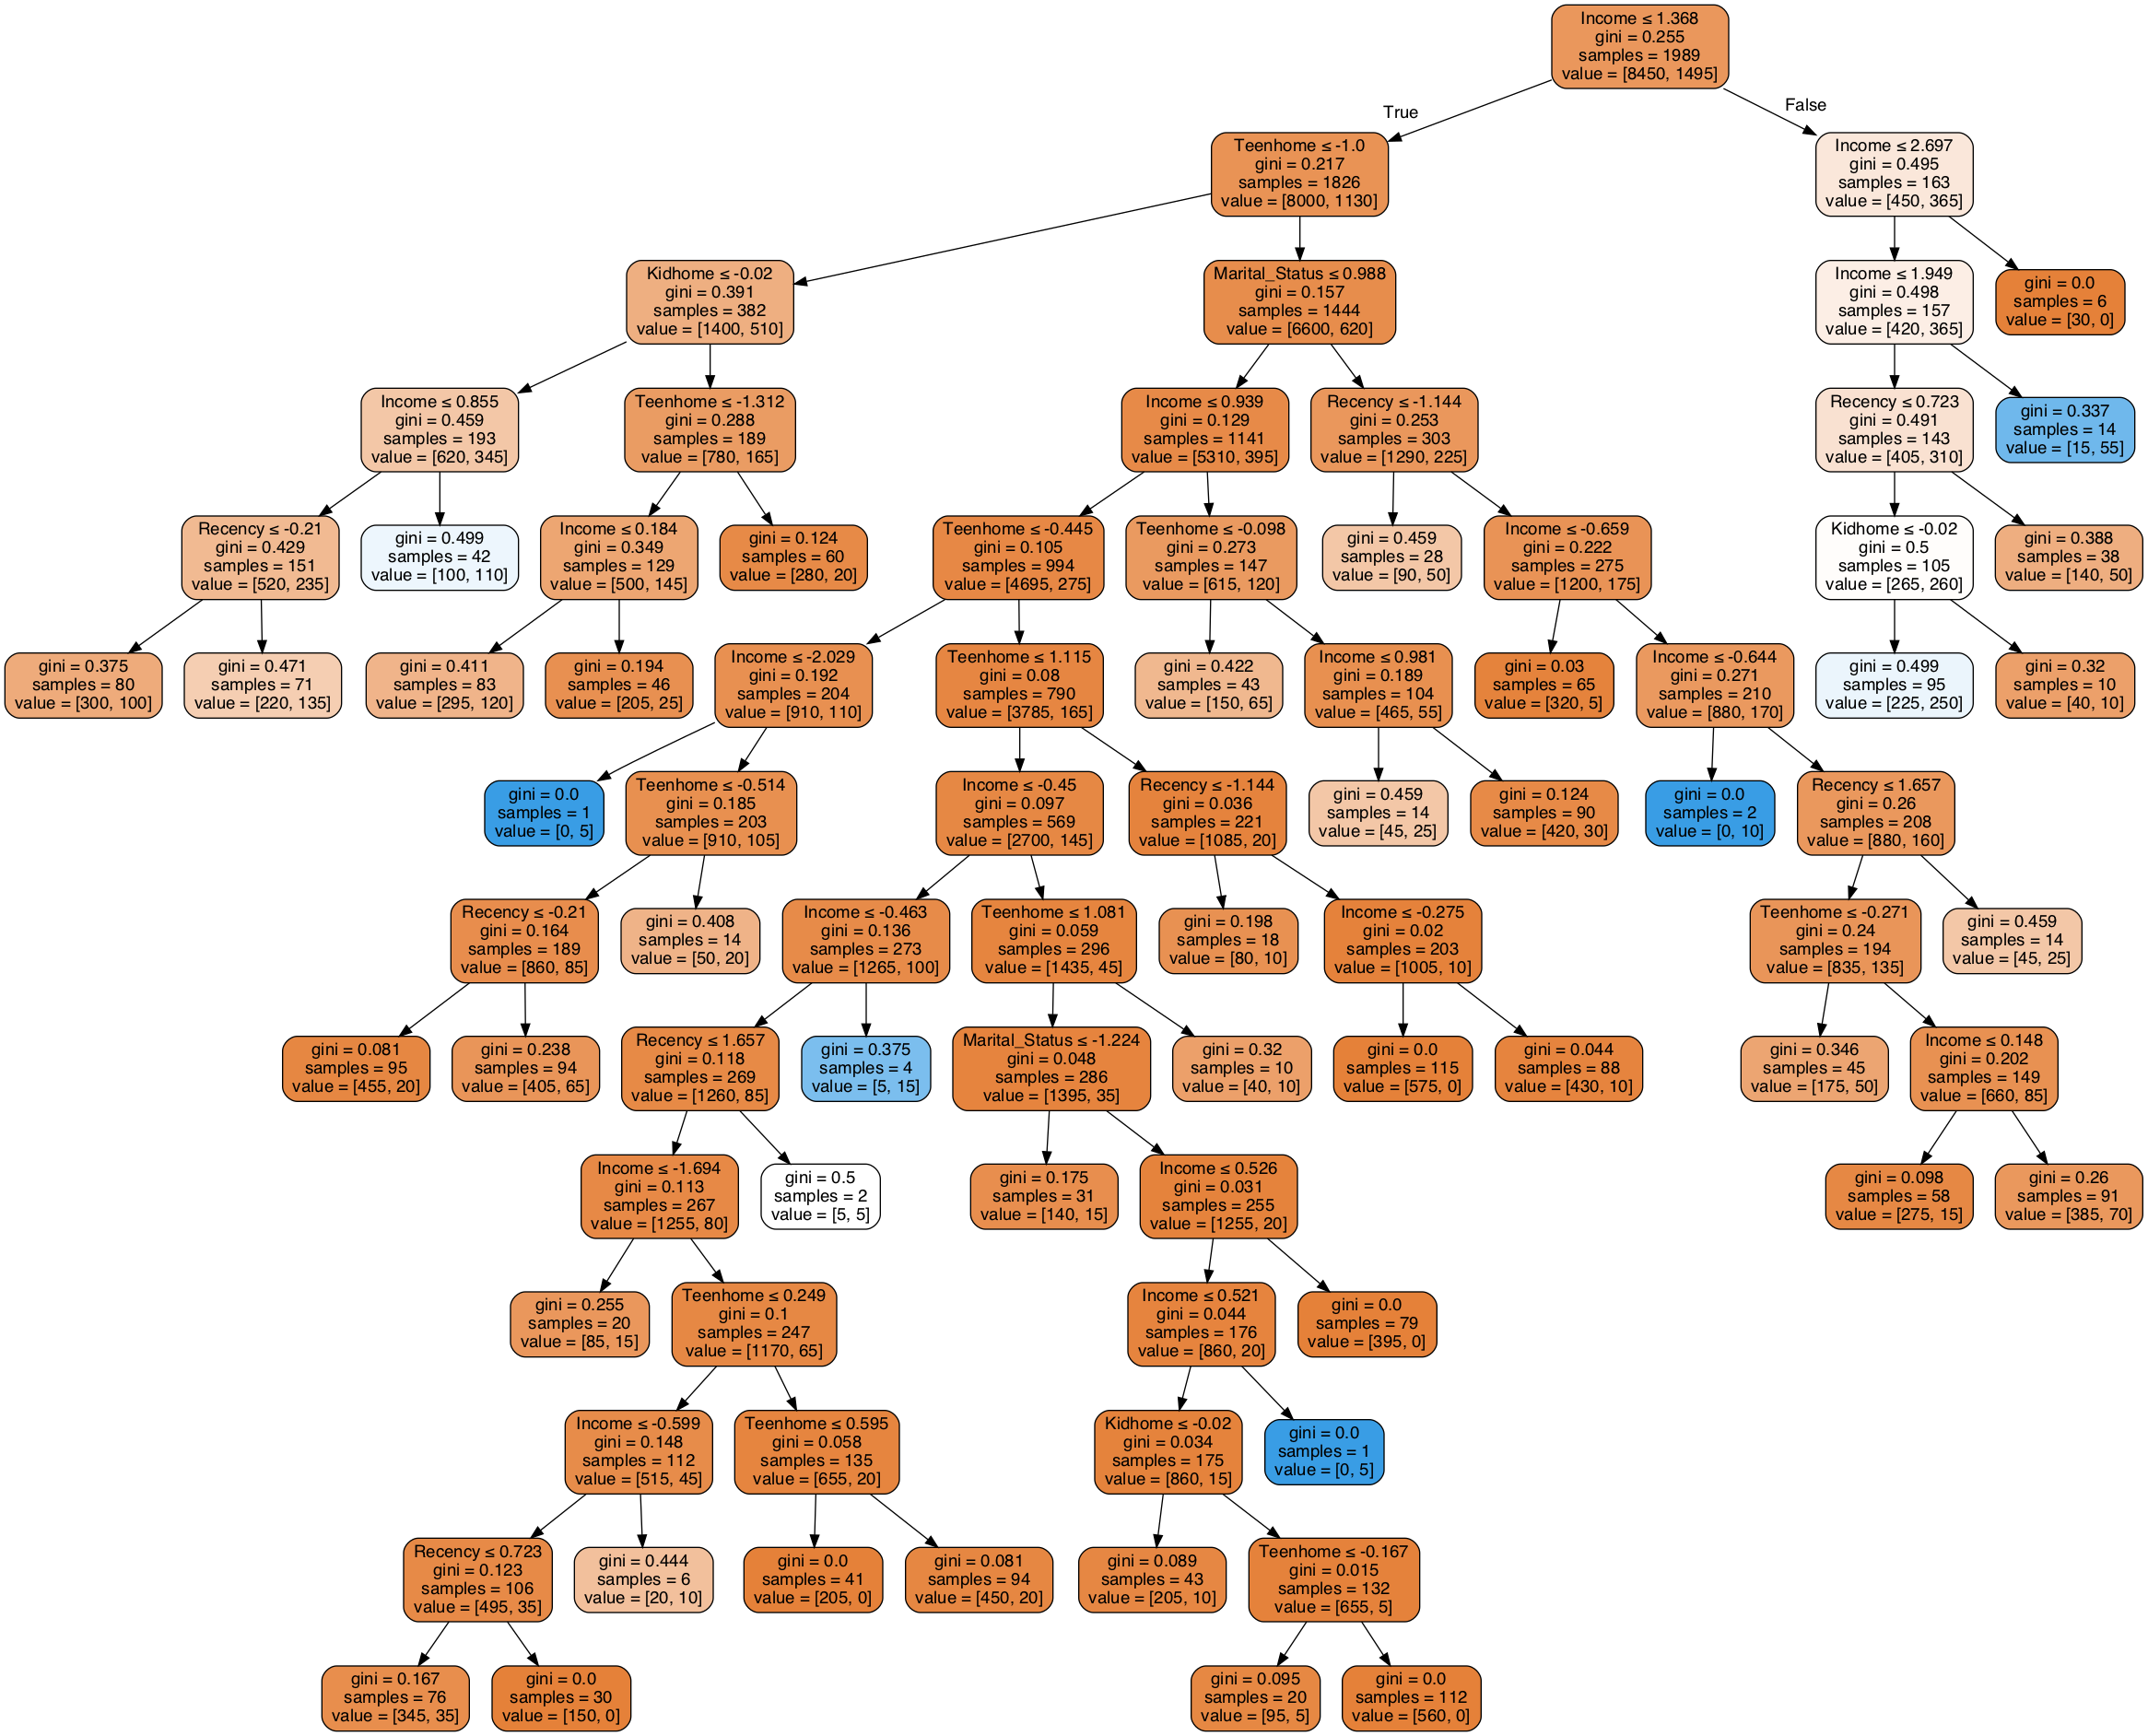

In [425]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(modelDTC, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=dataInputSelected)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [193]:
def show_tree(tree, features, path):
    f = StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

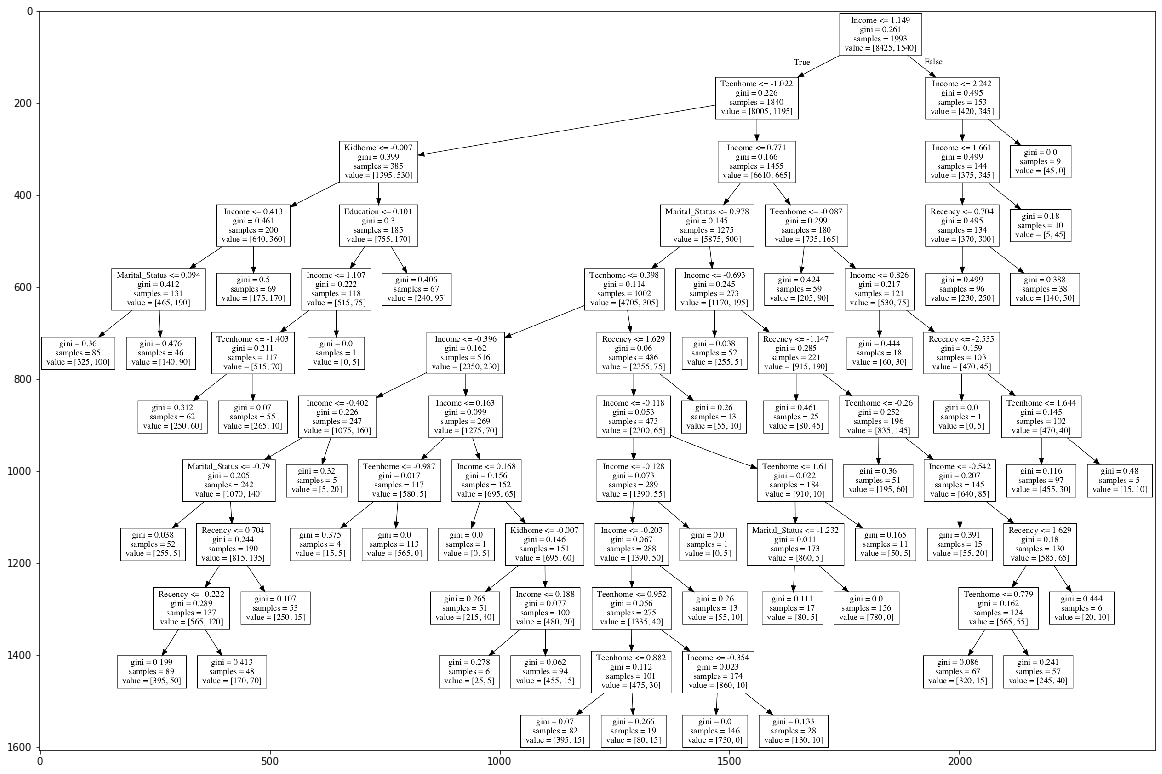

In [194]:
show_tree(modelDTC, dataInputSelected, "test.png")